In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.ensemble import RandomForestClassifier
import gc
gc.enable()

In [5]:
x_data = pd.read_csv('career-con-2019\X_train.csv')

In [6]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487680 entries, 0 to 487679
Data columns (total 13 columns):
row_id                   487680 non-null object
series_id                487680 non-null int64
measurement_number       487680 non-null int64
orientation_X            487680 non-null float64
orientation_Y            487680 non-null float64
orientation_Z            487680 non-null float64
orientation_W            487680 non-null float64
angular_velocity_X       487680 non-null float64
angular_velocity_Y       487680 non-null float64
angular_velocity_Z       487680 non-null float64
linear_acceleration_X    487680 non-null float64
linear_acceleration_Y    487680 non-null float64
linear_acceleration_Z    487680 non-null float64
dtypes: float64(10), int64(2), object(1)
memory usage: 48.4+ MB


In [7]:
x_data.describe()

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
count,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000
mean,1904.500000,63.500000,-0.018050,0.075062,0.012458,-0.003804,0.000178,0.008338,-0.019184,0.129281,2.886468,-9.364886
std,1099.853353,36.949327,0.685696,0.708226,0.105972,0.104299,0.117764,0.088677,0.229153,1.870600,2.140067,2.845341
min,0.000000,0.000000,-0.989100,-0.989650,-0.162830,-0.156620,-2.371000,-0.927860,-1.268800,-36.067000,-121.490000,-75.386000
25%,952.000000,31.750000,-0.705120,-0.688980,-0.089466,-0.106060,-0.040752,-0.033191,-0.090743,-0.530833,1.957900,-10.193000
50%,1904.500000,63.500000,-0.105960,0.237855,0.031949,-0.018704,0.000084,0.005412,-0.005335,0.124980,2.879600,-9.365300
75%,2857.000000,95.250000,0.651803,0.809550,0.122870,0.097215,0.040527,0.048068,0.064604,0.792263,3.798800,-8.522700
max,3809.000000,127.000000,0.989100,0.988980,0.155710,0.154770,2.282200,1.079100,1.387300,36.797000,73.008000,65.839000


In [8]:
x_data.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


In [9]:
x_data=x_data.drop(['row_id'], axis = 1)

In [10]:
y_data = pd.read_csv('career-con-2019/y_train.csv')
y_data=y_data.drop(['series_id'], axis = 1)
y_data=y_data.drop(['group_id'], axis = 1)

C:\Users\Hotstone\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\Hotstone\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


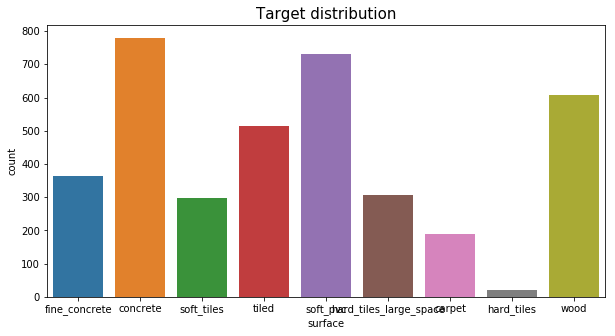

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(y_data['surface'])
plt.title('Target distribution', size=15)
plt.show()

In [13]:
x_train = x_train.values

In [47]:
x_train.shape[1]

171

In [198]:
def SetNormalDistibution(data):
    for i in range(4, 12):
        arr = np.array(data.iloc[:,i])
        arr = (arr - arr.mean()) / arr.std()
        data.iloc[:,i] = arr
    return data

x_data = SetNormalDistibution(x_data)

In [14]:
x_data.head()

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


In [22]:
def fe(x_data, num):
    x_train = []
    for i in range (num):
        li = []
        df = x_data[(x_data.series_id == i)]
        np_x_data = np.array(x_data)
        tmp = np.array(df)
        for j in range(2, 12):
            if j >= 9:
                li.append((tmp[:,j].mean()))
            elif 2 < j <= 4:
                for k in range(4):
                    li.append(tmp[k*32:(k+1)*32,j].mean())      
            elif (j != 6) & (j != 7):
                li.append(tmp[:,j].mean())
        x_train.append(li)
    return x_train

In [13]:
x_train = fe(x_data, y_data)
x_train = np.array(x_train)
x_train.shape[1]

14

In [14]:
surface = y_data.drop_duplicates('surface')
surfaceList = np.array(surface['surface'])

def ListMaptoDict(somelist):
    return {somelist[x]:x for x in range(len(somelist))}

surfaceDict = ListMaptoDict(surfaceList)
y_data['surface'] = y_data['surface'].map(surfaceDict)

In [18]:
y_train = y_train.values

In [20]:
def BuildMode(learning_rate, regularizer_rate):
    model = keras.Sequential()
    model.add(keras.layers.Dense(x_train.shape[1], input_shape=(x_train.shape[1], )))
    model.add(keras.layers.Dense(x_train.shape[1], activation='relu'))
    model.add(keras.layers.Dense(x_train.shape[1], activation='relu'))
    model.add(keras.layers.Dense(x_train.shape[1], activation='relu'))
    model.add(keras.layers.Dense(x_train.shape[1], activation='relu'))
    model.add(keras.layers.Dense(x_train.shape[1], activation='relu'))
    model.add(keras.layers.Dense(x_train.shape[1], activation='relu'))
    model.add(keras.layers.Dense(x_train.shape[1], activation='relu'))
    model.add(keras.layers.Dense(x_train.shape[1], activation='relu'))
    model.add(keras.layers.Dense(x_train.shape[1], activation='relu'))
    model.add(keras.layers.Dense(x_train.shape[1], activation='relu'))
    model.add(keras.layers.Dense(x_train.shape[1], activation='relu'))
    model.add(keras.layers.Dense(x_train.shape[1], activation='relu'))
    model.add(keras.layers.Dense(len(surfaceDict), activation='softmax'))

    opt = keras.optimizers.Adam(lr=learning_rate)
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [21]:
skf = StratifiedKFold(n_splits = 10, shuffle=True, random_state=59)
scores = []
models = []
current_fold = 1
for train, test in skf.split(x_train, y_train):
    print('commencing fold {}'.format(current_fold))
   
    print('  preparing data...')
    Xt = x_train[train]
    Yt = keras.utils.to_categorical(y_train[train], len(surfaceDict))
    Xv = x_train[test]
    Yv = keras.utils.to_categorical(y_train[test], len(surfaceDict))

    print('  building model...')
    classifier = BuildMode(0.001, 0)
    print('  fitting model...')
    classifier.fit(Xt, Yt, epochs=3000, batch_size=256, verbose=False)
    print('  evaluating model...')
    score = classifier.evaluate(Xv, Yv, batch_size=1024, verbose=False)
    scores.append(score[-1])
    models.append(classifier)
    print('  fold {} accuracy: {}'.format(current_fold, score[-1]*100))
    current_fold += 1
    
print('ensemble average accuracy: {} % (+/- {} %)'.format(np.mean(scores)*100, np.std(scores)*100))

commencing fold 1
  preparing data...
  building model...
Instructions for updating:
Colocations handled automatically by placer.
  fitting model...
Instructions for updating:
Use tf.cast instead.
  evaluating model...
  fold 1 accuracy: 61.55844330787659
commencing fold 2
  preparing data...
  building model...
  fitting model...
  evaluating model...
  fold 2 accuracy: 59.375
commencing fold 3
  preparing data...
  building model...
  fitting model...
  evaluating model...
  fold 3 accuracy: 59.007835388183594
commencing fold 4
  preparing data...
  building model...
  fitting model...
  evaluating model...
  fold 4 accuracy: 60.47120690345764
commencing fold 5
  preparing data...
  building model...
  fitting model...
  evaluating model...
  fold 5 accuracy: 63.77952694892883
commencing fold 6
  preparing data...
  building model...
  fitting model...
  evaluating model...
  fold 6 accuracy: 59.317582845687866
commencing fold 7
  preparing data...
  building model...
  fitting model

In [23]:
x_testdata = pd.read_csv('career-con-2019\X_test.csv')
x_testdata = x_testdata.drop(['row_id'], axis = 1)

In [25]:
x_test = fe(x_testdata, 3816)

In [29]:
x_test = np.array(x_test)

In [30]:
predicted = models[4].predict(x_test)

In [39]:
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=59)
predicted = np.zeros((3816,9))
measured= np.zeros((x_train.shape[0]))
score = 0
for times, (trn_idx, val_idx) in enumerate(folds.split(x_train, y_train['surface'].values)):
    model = RandomForestClassifier(n_estimators=1000, n_jobs = -1)
    #model = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=5, n_jobs=-1)
    model.fit(x_train[trn_idx],y_train['surface'][trn_idx])
    measured[val_idx] = model.predict(x_train[val_idx])
    predicted += model.predict_proba(x_test)/folds.n_splits
    score += model.score(x_train[val_idx],y_train['surface'][val_idx])
    print("Fold: {} score: {}".format(times,model.score(x_train[val_idx],y_train['surface'][val_idx])))

    importances = model.feature_importances_
    indices = np.argsort(importances)
    
    if model.score(x_train[val_idx],y_train['surface'][val_idx]) > 0.92000:
        hm = 30
        plt.figure(figsize=(7, 10))
        plt.title('Feature Importances')
        plt.barh(range(len(indices[:hm])), importances[indices][:hm], color='b', align='center')
        plt.xlabel('Relative Importance')
        plt.show()

    gc.collect()

Fold: 0 score: 0.7376623376623377
Fold: 1 score: 0.7265625
Fold: 2 score: 0.7362924281984334
Fold: 3 score: 0.7617801047120419
Fold: 4 score: 0.7716535433070866
Fold: 5 score: 0.7690288713910761
Fold: 6 score: 0.7349081364829396
Fold: 7 score: 0.7150395778364116
Fold: 8 score: 0.7433862433862434
Fold: 9 score: 0.7872340425531915


In [31]:
result = []
for i in range(len(predicted)):
    result.append(np.argmax(predicted[i]))

In [32]:
surfaceDict = {y:x for x,y in surfaceDict.items()}


In [33]:
for i in range(len(result)):
    result[i] = surfaceDict[result[i]]

In [34]:
pdResult = pd.read_csv('career-con-2019\sample_submission.csv')
pdResult['surface'] = result;
pdResult.to_csv('result.csv', index = False)

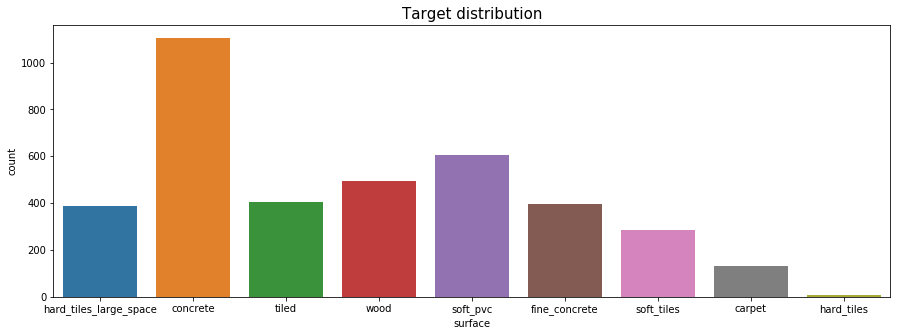

In [35]:
plt.figure(figsize=(15, 5))
sns.countplot(pdResult['surface'])
plt.title('Target distribution', size=15)
plt.show()